In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Boston.csv')

In [4]:
df=df.iloc[:,1:]
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86,23.3
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0


In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
X=df.drop('medv',axis=1)
y=df['medv']

In [10]:
#we do train test split because all these correlation thing will be done
#on training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((354, 13), (152, 13))

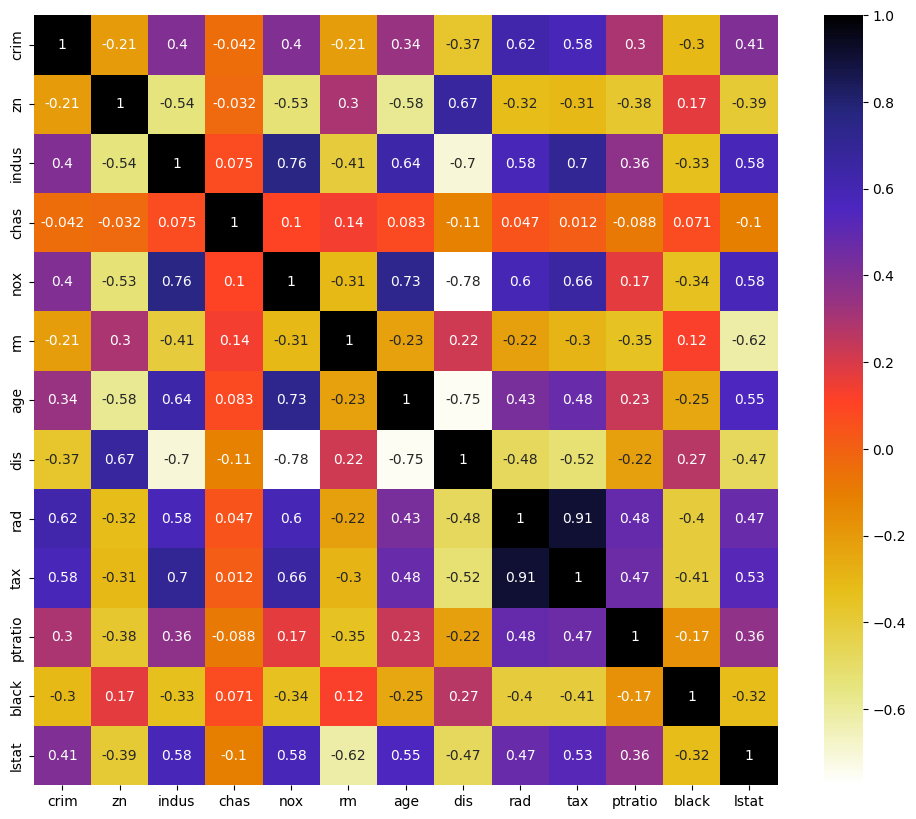

In [11]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
#tax to rad is 91% means either of them will be kept

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            #we are keeping -ve correlated so removing abs
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
#to avoid overfitting we do this on X_train only
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [19]:
corr_features

{'age', 'nox', 'tax'}

In [20]:
#these are highly correlated features so we directly remove them

X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,crim,zn,indus,chas,rm,dis,rad,ptratio,black,lstat
173,0.09178,0.0,4.05,0,6.416,2.6463,5,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,6.758,4.0776,4,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,5.983,1.8681,4,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,6.065,5.2873,4,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,6.297,2.3682,24,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,6.406,2.0651,24,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,5.813,4.0952,4,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,8.725,2.8944,8,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,6.436,2.3158,24,20.2,100.19,16.22
